<a href="https://colab.research.google.com/github/ignacioabalos/E337-Grupo4/blob/main/Big_Data_TP1_Grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte nacho-marcos

In [ ]:
import os
import pandas as pd

# Definimos la ruta base
file_path = "/Users/ignacioabalos/Desktop/E337-Grupo4/TP1/"

# Leemos los archivos como DataFrames
df_2004 = pd.read_stata(file_path + "usu_individual_T104.dta")
df_2024 = pd.read_excel(file_path + "usu_individual_T124.xlsx")

# Agregamos la columna de año
df_2004["anio"] = 2004
df_2024["anio"] = 2024

# Chequeamos las bases
print(df_2004.head(5))
print(df_2024.head(5))





# Agarramos la base de datos del 2004 y filtro solo las observaciones donde la columna 'Region' sea "NEA"
df_nea = df_2004[df_2004["region"] == "NEA"]

# Guardamos la base filtrada en un nuevo archivo Stata
df_nea.to_stata("base_filtrada_nea.dta", write_index=False)

# Verificamos las primeras filas de la base filtrada
print(df_nea.head())






# Agarramos la base de datos del 2024 y filtro solo las observaciones donde la columna 'Region' sea 41
df_neaa = df_2024[df_2024["REGION"] == 41]

# Guardamos la base filtrada en un nuevo archivo Excel
df_neaa.to_excel("base_filtrada_region_41.xlsx", index=False)

# Verificamos las primeras filas de la base filtrada
print(df_neaa.head())







# Unimos las bases anteriormente filtradas usando la funcion pd.concat (quise usar .append() pero me decia que desde la version 1.4 esa funcion fue eliminada)
df_unido = pd.concat([df_nea, df_neaa], ignore_index=True)

# Guardamos la base unida en un nuevo archivo Excel
df_unido.to_excel("base_unida.xlsx", index=False)

# Verificamos las primeras filas de la base unida
print(df_unido.head())






import seaborn as sns
import matplotlib.pyplot as plt

# utilizamos la base de datos unida y procedemos a hacer el heatmap para ambos años
df_unido = pd.concat([df_nea, df_neaa], ignore_index=True)

# Creamos el heatmap de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df_unido.isnull(), cmap="viridis", cbar=False, yticklabels=False)

# Agregamos título
plt.title("Heatmap de valores faltantes en 10 variables de la EPH de ambos años", fontsize=14)

# Mostramos el gráfico
plt.show()




# Buscamos valores negativos en la base
valores_negativos = (df_unido < 0).any()

# Mostramos las columnas que tienen valores negativos (esto falta terminar)
print("📌 Columnas con valores negativos:")
print(valores_negativos[valores_negativos == True])



In [ ]:
#EJERCICIO 3

# Contamos la cantidad de hombres y mujeres en cada año
sexo_por_anio_2004 = df_nea.groupby(["ano4", "ch04"], observed=False).size().unstack()
sexo_por_anio_2024 = df_neaa.groupby(["ANO4", "CH04"], observed=False).size().unstack()

# Renombramos las columnas (1 = Hombres, 2 = Mujeres)
sexo_por_anio_2004.columns = ["Hombres", "Mujeres"]
sexo_por_anio_2024.columns = ["Hombres", "Mujeres"]

# Creamos la figura con dos subgráficos (uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# Definimos colores para cada sexo
colores = ["#1f77b4", "#ff7f0e"]  # Azul para hombres, Naranja para mujeres

# Gráfico de 2004
sexo_por_anio_2004.T.plot(kind="bar", ax=axes[0], color=colores)
axes[0].set_title("Distribución por Sexo - 2004", fontsize=14)
axes[0].set_xlabel("Sexo", fontsize=12)
axes[0].set_ylabel("Cantidad de Personas", fontsize=12)
axes[0].set_xticklabels(["Hombres", "Mujeres"], rotation=0)
axes[0].legend(labels=["Hombres", "Mujeres"])  # Cambiar leyenda

# Gráfico de 2024
sexo_por_anio_2024.T.plot(kind="bar", ax=axes[1], color=colores)
axes[1].set_title("Distribución por Sexo - 2024", fontsize=14)
axes[1].set_xlabel("Sexo", fontsize=12)
axes[1].set_xticklabels(["Hombres", "Mujeres"], rotation=0)
axes[1].legend(labels = ["Mujeres", "Hombres"])   # Cambiar leyenda

# Ajustamos el espacio entre los gráficos
plt.tight_layout()

# Guardamos la imagen si es necesario
plt.savefig("graficos_sexo_lado_a_lado.png", dpi=300)

# Mostramos los gráficos
plt.show()

In [ ]:
#EJERCICIO 4

# Definimos las variables de interés
variables_interes = ["CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]

# Filtramos la base para incluir solo las columnas de interés y separarndolas por ano
df_corr_2004 = df_unido[df_unido["anio"] == 2004][variables_interes]
df_corr_2024 = df_unido[df_unido["anio"] == 2024][variables_interes]

# Calculamos la matriz de correlación
corr_matrix_2004 = df_corr_2004.corr()
corr_matrix_2024 = df_corr_2024.corr()

# Creamos la figura con subgráficos (uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graficamos la matriz de correlación para 2004
sns.heatmap(corr_matrix_2004, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Matriz de Correlación - 2004")
#Notamos que como hay missing values para este año, la tabla de correlacion esta vacía.

# Graficamos la matriz de correlación para 2024
sns.heatmap(corr_matrix_2024, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Matriz de Correlación - 2024")

# Ajustamos el layout y mostramos el grafico combinado
plt.tight_layout()
plt.show()

# Versión Teo

Librerías

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile

Subir archivos

In [ ]:
from google.colab import files

# Subir los archivos desde la computadora
uploaded = files.upload()



Saving EPH_usu_1_Trim_2024_xls.zip to EPH_usu_1_Trim_2024_xls (1).zip
Saving t104_dta.zip to t104_dta (1).zip


In [ ]:
# Creamos diccionario vacio
dataframes = {}

# Iteramos sobre los nombres de los archivos subidos
for zip_file_name in uploaded.keys():
  # Leemos cada archivo .zip
  with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Obtenemos los nombres de los archivos
    for file_name in zip_ref.namelist():
      # Leemos cada archivo debtro del zip
      with zip_ref.open(file_name) as file:
        # Verificamos si es de excel o stata para leerlo
        # adecuadamente y guardamos el dataframe en el diccionario
        # eliminando la extension
        if file_name.endswith('.xlsx'):
          df = pd.read_excel(file)
          dataframes[file_name[:-5]] = df
        elif file_name.endswith('.dta'):
          df = pd.read_stata(file)
          dataframes[file_name[:-4]] = df

print(dataframes.keys()) # Vemos los archivos que tenemos

dict_keys(['EPH_usu_1er_Trim_2024_xlsx/usu_hogar_T124', 'EPH_usu_1er_Trim_2024_xlsx/usu_individual_T124', 'Hogar_t104', 'Individual_t104'])


In [ ]:
# Creamos un dataframe con la EPH individual para cada año
df_2004 = dataframes['Individual_t104']
df_2024 = dataframes['EPH_usu_1er_Trim_2024_xlsx/usu_individual_T124']

# Chequeamos las bases
print(df_2004.head(5))
print(df_2024.head(5))
print(df_2004.columns)
print(df_2024.columns)
print(df_2004.shape)
print(df_2024.shape)
print(df_2004.index)
print(df_2024.index)

     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

In [ ]:
# Nos aseguramos de que todos los nombres de las variables sean minusculas
df_2004.columns = df_2004.columns.str.lower()
df_2024.columns = df_2024.columns.str.lower()
print(df_2004.columns)
print(df_2024.columns)

# Vemos codigos para cada region
print(df_2004["region"].unique())
print(df_2024["region"].unique())

# Nos quedamos solo con las observaciones del NEA
df_2004_nea = df_2004[df_2004["region"] == "NEA"]
df_2024_nea = df_2024[df_2024["region"] == 41]
print(df_2004_nea.shape)
print(df_2024_nea.shape)

# Vemos las variables en comun
matching_columns = set(df_2004_nea.columns).intersection(set(df_2024_nea.columns))
print("Columnas en común:", matching_columns)

# Y tambien las que no coinciden
df_2004_unique = set(df_2004_nea.columns) - matching_columns
df_2024_unique = set(df_2024_nea.columns) - matching_columns

print("Columnas únicas en df_2004:", df_2004_unique)
print("Columnas únicas en df_2024:", df_2024_unique)

# Unimos ambas bases
df_combined = pd.concat([df_2004_nea, df_2024_nea], axis=0, ignore_index=True)
print(df_combined)

Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)
Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'pondih'],
      dtype='object', length=177)
['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']
[42 41 40 43 44  1]
(5343, 176)
(4850, 177)
Columnas en común: {'pp02h', 'pp03g', 'pp06e', 'pp02c3', 'pp02c8', 'h15', 'pdecifr', 'itf', 'idecifr', 'ch12', 'pp05e', 'codusu', 'pp04c99', 'nro_hogar', 'ch08', 'pp11g_ano', 'pp08f1', 'pp11c', 'v19_am', 'v4_m'

Heatmap

{'pp02h', 'pp03g', 'pp06e', 'pp02c3', 'pp02c8', 'h15', 'pdecifr', 'itf', 'idecifr', 'ch12', 'pp05e', 'codusu', 'pp04c99', 'nro_hogar', 'ch08', 'pp11g_ano', 'pp08f1', 'pp11c', 'v19_am', 'v4_m', 'rdecocur', 'ch03', 'ch10', 'pp08f2', 'pp11o', 'pp08d4', 'ch15_cod', 'pp10e', 'pp05c_3', 'pp07g3', 'gdecocur', 'idecindr', 'pp07g1', 'v5_m', 'cat_ocup', 'pp09c', 'pp11t', 'ch04', 'pp05h', 'pp11b_cod', 'pp02c1', 'pp07e', 'ch13', 'pp02c6', 'v11_m', 'ch16', 'pp03j', 'pondera', 'pp11b2_ano', 'pp07a', 'pp05f', 'ch09', 'estado', 'pp07g4', 'pp11p', 'pp3f_tot', 'pp04d_cod', 'adecifr', 'pp07g2', 'pp11d_cod', 'pp04b1', 'pp06a', 'pp05c_2', 'pp11b1', 'v21_m', 'adeccfr', 'pp07f3', 'pp07c', 'pp04b3_mes', 'pp09a_esp', 'pp02i', 'cat_inac', 'pp11g_dia', 'pp11q', 'idecocur', 'v8_m', 'pp06h', 'nivel_ed', 'pp07d', 'v9_m', 'deccfr', 'ano4', 'pp11b2_mes', 'pp03h', 'pp05b2_dia', 'pp04a', 'v10_m', 'pp09b', 'rdeccfr', 'ch06', 'ideccfr', 'pp03c', 'pp11m', 'tot_p12', 'pp07k', 'pdecindr', 'pp04b3_ano', 'pp04b2', 'pp07f1', '

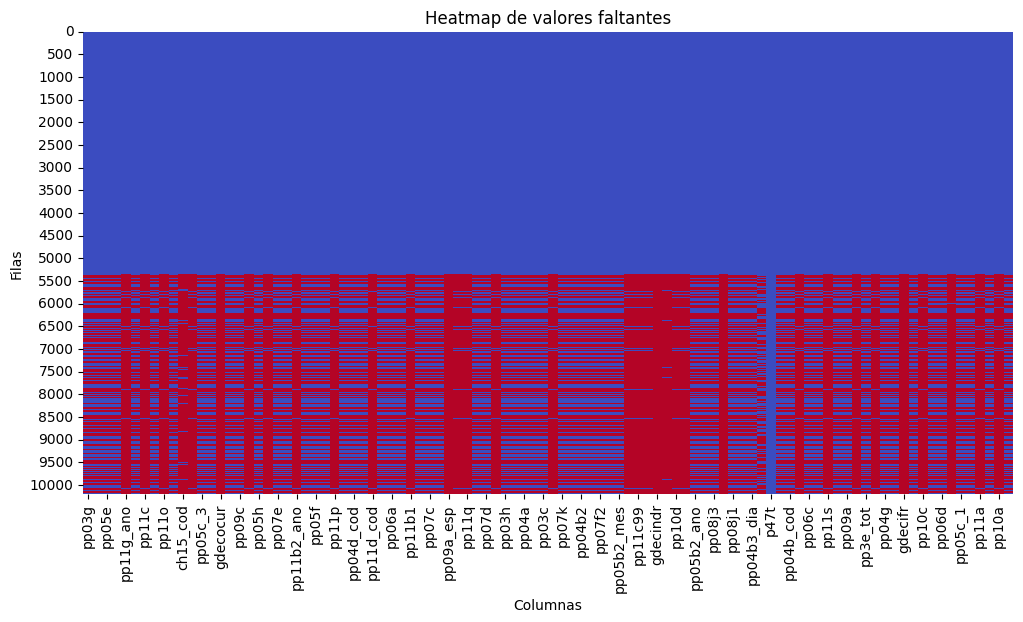

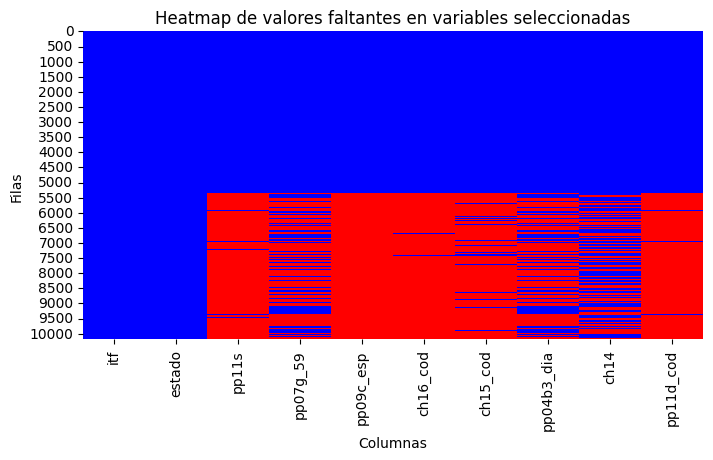

In [ ]:
print(matching_columns)
# Identificamos las columnas con valores faltantes y creamos un dataframe
columns_with_missing_values = [col for col in matching_columns if df_combined[col].isnull().any()]
df_combined_filtered = df_combined[columns_with_missing_values]

print(df_combined_filtered.columns.tolist())

# Creamos un heatmap con las variables faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df_combined_filtered.isnull(), cbar=False, cmap="coolwarm")
plt.title("Heatmap de valores faltantes")
plt.xlabel("Columnas")
plt.ylabel("Filas")
# Configurar ticks del eje y cada 500
num_rows = df_combined_filtered.shape[0]  # Total de filas en el DataFrame
y_ticks = range(0, num_rows + 1, 500)  # Crear ticks de 0 a num_rows en pasos de 500
plt.yticks(ticks=y_ticks, labels=[str(y) for y in y_ticks])  # Aplicar los ticks al eje y
plt.show()

# Elegimos 10 variables
# Tomamos 8 variables con patrones faltantes distintos y agregamos el ingreso total familiar y el estado
diez_heatmap = ['itf', 'estado', 'pp11s', 'pp07g_59', 'pp09c_esp', 'ch16_cod', 'ch15_cod', 'pp04b3_dia', 'ch14', 'pp11d_cod']

# Creamos el dataframe con estas 10 variables para realizar el heatmap
df_combined_diez = df_combined[diez_heatmap]

plt.figure(figsize=(8, 4))
sns.heatmap(df_combined_diez.isnull(), cbar=False, cmap="bwr")
plt.title("Heatmap de valores faltantes en variables seleccionadas")
plt.xlabel("Columnas")
plt.ylabel("Filas")
# Configurar ticks del eje y cada 500
num_rows10 = df_combined_diez.shape[0]  # Total de filas en el DataFrame
y_ticks10 = range(0, num_rows10 + 1, 500)  # Crear ticks de 0 a num_rows en pasos de 500
plt.yticks(ticks=y_ticks10, labels=[str(y) for y in y_ticks10])  # Aplicar los ticks al eje y
plt.show()


Limpieza de la base de datos

In [ ]:
# Iteramos buscando tipos de datos que no coinciden
for col in matching_columns:
    dtype_2004 = df_2004_nea[col].dtype
    dtype_2024 = df_2024_nea[col].dtype

    if dtype_2004 != dtype_2024:
        print(f"\n⚠️ Tipo de datos no coincide en columna: '{col}':")
        print(f"  df_2004_nea: {dtype_2004}")
        print(f"  df_2024_nea: {dtype_2024}")

        # Vemos 5 valores no nulos para darnos una idea de la discrepancia
        non_na_2004 = df_2004_nea[col].dropna()
        non_na_2024 = df_2024_nea[col].dropna()

        print(f"  Sample values from df_2004_nea['{col}']:", non_na_2004.sample(min(5, len(non_na_2004)), random_state=1).tolist())
        print(f"  Sample values from df_2024_nea['{col}']:", non_na_2024.sample(min(5, len(non_na_2024)), random_state=1).tolist())


# Creamos una copia del dataframe combinado para no perderelo
df_combined_tydy = df_combined.copy()




⚠️ Tipo de datos no coincide en columna: 'pp02h':
  df_2004_nea: category
  df_2024_nea: int64
  Sample values from df_2004_nea['pp02h']: [0.0, 'No', 'No', 0.0, 0.0]
  Sample values from df_2024_nea['pp02h']: [0, 0, 0, 1, 0]

⚠️ Tipo de datos no coincide en columna: 'pp03g':
  df_2004_nea: category
  df_2024_nea: float64
  Sample values from df_2004_nea['pp03g']: [0.0, 0.0, 0.0, 'No', 0.0]
  Sample values from df_2024_nea['pp03g']: [1.0, 2.0, 1.0, 2.0, 2.0]

⚠️ Tipo de datos no coincide en columna: 'pp06e':
  df_2004_nea: category
  df_2024_nea: float64
  Sample values from df_2004_nea['pp06e']: [0.0, 0.0, 0.0, 0.0, 0.0]
  Sample values from df_2024_nea['pp06e']: [0.0, 0.0, 0.0, 0.0, 0.0]

⚠️ Tipo de datos no coincide en columna: 'pp02c3':
  df_2004_nea: category
  df_2024_nea: int64
  Sample values from df_2004_nea['pp02c3']: ['Sí', 0.0, 0.0, 0.0, 0.0]
  Sample values from df_2024_nea['pp02c3']: [0, 0, 0, 0, 0]

⚠️ Tipo de datos no coincide en columna: 'pp02c8':
  df_2004_nea: catego

Reemplazos de tipo de dato

In [ ]:
def convertir_float(df, cols):
    for col in cols:
        # Convertimos valores no nulos a floats
        df[col] = df[col].apply(lambda x: float(x) if pd.notna(x) else x)

def convertir_int(df, cols):
    for col in cols:
        # Convertimos valores no nulos a int
        df[col] = df[col].apply(lambda x: int(x) if pd.notna(x) else x)

def convertir_string(df, cols):
    for col in cols:
        # Convertimos valores no nulos a string
        df[col] = df[col].apply(lambda x: str(x) if pd.notna(x) else x)

def convertir_categorical(df, cols):
    for col in cols:
        # Convertimos la columna a tipo categoría
        df[col] = df[col].astype('category')


# Observamos valores unicos de variables
print(df_combined_tydy["ch06"].unique())

def convertir_num_nan(df, cols):
    """
    Convertimos valores a numericos y forzamos NaN en aquellos que no lo son.
    Esto es para respuestas de texto cuando deberíamos tener numeros según la pregunta

    Parámetros:
    - df (pd.DataFrame): DataFrame a modificar.
    - cols (lista): Lista con nombre/s de columnas para convertir.
    """
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Valores únicos en columna '{col}' después de modificación:", df[col].unique())

# Aplicamos la funcion
convertir_num_nan(df_combined_tydy, ["ch06"])


# Definimos las listas para convertir
cols_to_int = ['ch06', 'ano4']
cols_to_float = []
cols_to_string = []
cols_to_categorical = []


# Aplicamos la función de conversión con las listas definidas
convertir_int(df_combined_tydy, cols_to_int)

# convertir_float(df_combined_tydy, cols_to_float)
# convertir_string(df_combined_tydy, cols_to_string)
# convertir_categorical(df_combined_tydy, cols_to_categorical)

# Verificamos
print(df_combined_tydy.dtypes)

[76.0 71.0 65.0 34.0 13.0 11.0 9.0 88.0 36.0 46.0 22.0 26.0 2.0 69.0 49.0
 47.0 16.0 39.0 35.0 37.0 40.0 14.0 12.0 7.0 43.0 42.0 51.0 25.0 18.0 27.0
 10.0 5.0 1.0 30.0 6.0 32.0 24.0 'Menos de 1 año' 23.0 45.0 59.0 93.0 56.0
 55.0 15.0 8.0 38.0 31.0 20.0 28.0 33.0 17.0 48.0 21.0 52.0 54.0 41.0 19.0
 44.0 66.0 4.0 64.0 62.0 61.0 29.0 73.0 58.0 60.0 68.0 86.0 81.0 3.0 83.0
 57.0 50.0 80.0 70.0 87.0 67.0 53.0 74.0 72.0 90.0 75.0 77.0 89.0 63.0
 79.0 82.0 84.0 95.0 78.0 '98 y más años' 85.0 91.0 -1 96 94 92]
Valores únicos en columna 'ch06' después de modificación: [76. 71. 65. 34. 13. 11.  9. 88. 36. 46. 22. 26.  2. 69. 49. 47. 16. 39.
 35. 37. 40. 14. 12.  7. 43. 42. 51. 25. 18. 27. 10.  5.  1. 30.  6. 32.
 24. nan 23. 45. 59. 93. 56. 55. 15.  8. 38. 31. 20. 28. 33. 17. 48. 21.
 52. 54. 41. 19. 44. 66.  4. 64. 62. 61. 29. 73. 58. 60. 68. 86. 81.  3.
 83. 57. 50. 80. 70. 87. 67. 53. 74. 72. 90. 75. 77. 89. 63. 79. 82. 84.
 95. 78. 85. 91. -1. 96. 94. 92.]
codusu         object
nro_hogar   

Eliminación de valores negativos


In [ ]:
def identify_negatives(df, cols):
    """
    Identifica e imprime filas que contienen números negativos en las columnas especificadas del DataFrame.

    Parámetros:
    - df (pd.DataFrame): DataFrame a modificar.
    - cols (lista): Lista con nombre/s de columnas para identificar.
    """
    for col in cols:
        # Filtra filas donde hay valores negativos
        negative_rows = df[df[col] < 0]

        if not negative_rows.empty:
            print(f"Se encontraron valores negativos en la columna '{col}':")

            # Imprime filas con valores negativos, mostrando solo la columna relevante
            print(negative_rows[[col]])

        else:
            print(f"No se encontraron valores negativos en la columna '{col}'.")

# Especificamos las columnas que se deben inspeccionar en busca de valores negativos
id_negativos = ['ipcf', 'ch06']

# Llamamos a la función
identify_negatives(df_combined_tydy, id_negativos)


def replace_negs(df, cols):
    """
    Reemplaza números negativos con NaN en las columnas especificadas del DataFrame.

    Parámetros:
    - df (pd.DataFrame): DataFrame a modificar.
    - cols (lista): Lista con nombre/s de columnas para reemplazar.
    """
    for col in cols:
        df[col] = df[col].apply(lambda x: np.nan if pd.notna(x) and x < 0 else x)

# Lista con columnas en las que vimos numeros negativos
hay_negativos = ['ch06']

# Llamamos a la función
replace_negs(df_combined_tydy, hay_negativos)

# Verificamos que ya no haya negativos
for col in hay_negativos:
    print(f"Unique values in '{col}':", df_combined_tydy[col].unique())

No se encontraron valores negativos en la columna 'ipcf'.
Se encontraron valores negativos en la columna 'ch06':
       ch06
5368   -1.0
5456   -1.0
5670   -1.0
5839   -1.0
5876   -1.0
5923   -1.0
6286   -1.0
6328   -1.0
6654   -1.0
6724   -1.0
6880   -1.0
7068   -1.0
7349   -1.0
7676   -1.0
7719   -1.0
7808   -1.0
7939   -1.0
7952   -1.0
8192   -1.0
8215   -1.0
8439   -1.0
8504   -1.0
8521   -1.0
8522   -1.0
8554   -1.0
8770   -1.0
8771   -1.0
8791   -1.0
8810   -1.0
8977   -1.0
8978   -1.0
8996   -1.0
9083   -1.0
9125   -1.0
9617   -1.0
9810   -1.0
9886   -1.0
10031  -1.0
10036  -1.0
10090  -1.0
Unique values in 'ch06': [76. 71. 65. 34. 13. 11.  9. 88. 36. 46. 22. 26.  2. 69. 49. 47. 16. 39.
 35. 37. 40. 14. 12.  7. 43. 42. 51. 25. 18. 27. 10.  5.  1. 30.  6. 32.
 24. nan 23. 45. 59. 93. 56. 55. 15.  8. 38. 31. 20. 28. 33. 17. 48. 21.
 52. 54. 41. 19. 44. 66.  4. 64. 62. 61. 29. 73. 58. 60. 68. 86. 81.  3.
 83. 57. 50. 80. 70. 87. 67. 53. 74. 72. 90. 75. 77. 89. 63. 79. 82. 84.
 95. 

Reemplazo de categóricas y Eliminacion de valores sin sentido

In [ ]:
def map_with_general_handling(df, column, reverse_mapping, problematic_values=None):
    """
    Asigna valores en la columna especificada según el diccionario de asignación inversa.
    Maneja valores numéricos y strings para que estos coincidan.
    Parámetros:
    - df (pd.DataFrame): DataFrame que se modificará.
    - column (str): El nombre de la columna que se asignará.
    - reverse_mapping (dict): Un diccionario para asignar categorías a valores numéricos.
    - problematic_values ​​(set): Conjunto opcional de valores problemáticos conocidos que se reemplazarán con NaN.
    """
    print(f"Valores unicos en '{column}' antes del mapeo:", df[column].unique())

    df[column] = df[column].apply(
        lambda x: reverse_mapping.get(x, np.nan) if pd.notna(x) and isinstance(x, str) else x
    )

    if problematic_values:
        df[column] = df[column].apply(lambda x: np.nan if x in problematic_values else x)

    print(f"Valores unicos en '{column}' después del mapeo:", df[column].unique())



# Por las dudas vamos a copiar de nuevo el dataframe
df_combined_tydy2 = df_combined_tydy.copy()


# Mapear y homogeneizar valores

# ch04: Genero
ch04_mapping = {"Varón": 1, "Mujer": 2}
map_with_general_handling(df_combined_tydy2, 'ch04', ch04_mapping)

# ch07: Relación/estado civil
ch07_mapping = {
    "Unido": 1, "Casado": 2, "Separado o divorciado": 3,
    "Viudo": 4, "Soltero": 5
}
map_with_general_handling(df_combined_tydy2, 'ch07', ch07_mapping)


# ch08: Cobertura de salud
ch08_mapping = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y Planes y Seguros Públicos": 13,
    "Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos": 23,
    "Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos": 123
}
map_with_general_handling(df_combined_tydy2, 'ch08', ch08_mapping)


# nivel_ed: Nivel educativo
nivel_ed_mapping = {
    "Primaria Incompleta (incluye educación especial)": 1,
    "Primaria Completa": 2,
    "Secundaria Incompleta": 3,
    "Secundaria Completa": 4,
    "Superior Universitaria Incompleta": 5,
    "Superior Universitaria Completa": 6,
    "Sin instrucción": 7,
    "Ns./Nr.": 9
}
map_with_general_handling(df_combined_tydy2, 'nivel_ed', nivel_ed_mapping)


# estado: Situación laboral
estado_mapping = {
    "Entrevista individual no realizada (no respuesta al cuestion)": 0,
    "Ocupado": 1, "Desocupado": 2, "Inactivo": 3, "Menor de 10 años": 4
}
map_with_general_handling(df_combined_tydy2, 'estado', estado_mapping)


# cat_inac: Categoría de inactividad
cat_inac_mapping = {
    "Jubilado/pensionado": 1, "Rentista": 2, "Estudiante": 3,
    "Ama de casa": 4, "Menor de 6 años": 5, "Discapacitado": 6, "Otros": 7
}

# Acá vimos que hay un 0.0 que no corresponde a las respuestas esperadas
map_with_general_handling(df_combined_tydy2, 'cat_inac', cat_inac_mapping, problematic_values={0.0})


# Chequeamos el resultado
print(df_combined_tydy2[['nivel_ed', 'ch04', 'ch07', 'ch08', 'estado', 'cat_inac']])


Valores unicos en 'ch04' antes del mapeo: ['Mujer' 'Varón' 2 1]
Valores unicos en 'ch04' después del mapeo: [2 1]
Valores unicos en 'ch07' antes del mapeo: ['Unido' 'Viudo' 'Soltero' 'Casado' 'Separado o divorciado' 4 5 2 3 1]
Valores unicos en 'ch07' después del mapeo: [1 4 5 2 3]
Valores unicos en 'ch08' antes del mapeo: ['Obra social (incluye PAMI)' 'No paga ni le descuentan'
 'Mutual/Prepaga/Servicio de emergencia'
 'Obra social y mutual/prepaga/servicio de emergencia'
 'Planes y seguros públicos' 'Ns./Nr.' 1 4 12 3 2 9]
Valores unicos en 'ch08' después del mapeo: [ 1  4  2 12  3  9]
Valores unicos en 'nivel_ed' antes del mapeo: ['Superior Universitaria Completa'
 'Primaria Incompleta (incluye educación especial)'
 'Secundaria Incompleta' 'Primaria Completa'
 'Superior Universitaria Incompleta' 'Sin instrucción'
 'Secundaria Completa' 4 3 7 6 5 2 1]
Valores unicos en 'nivel_ed' después del mapeo: [6 1 3 2 5 7 4]
Valores unicos en 'estado' antes del mapeo: ['Inactivo' 'Ocupado' 'Men

Ejercicio 3

[2004 2024]
int64


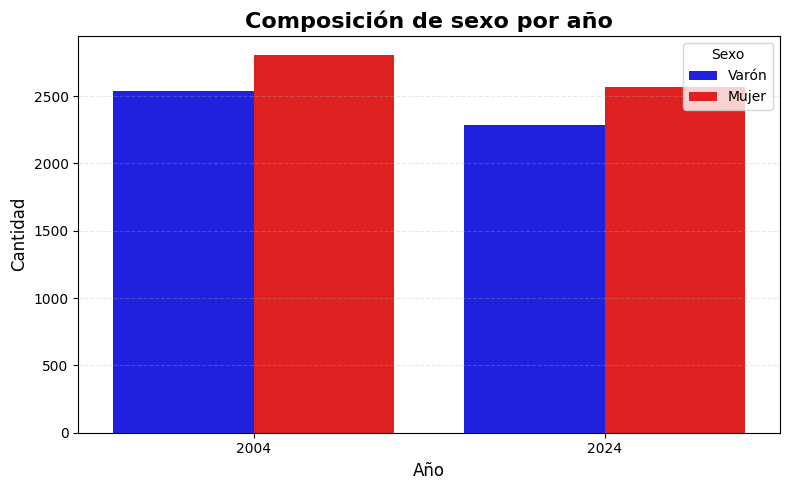

In [ ]:
# Nos aseguramos de tener los formatos correctos
print(df_combined_tydy2["ano4"].unique())
print(df_combined_tydy2["ano4"].dtype)

# Agrupar por año y género, luego contar las ocurrencias
gender_mapping = {
    1: "Varón",
    2: "Mujer"}

composition = df_combined_tydy2.groupby(['ano4', 'ch04']).size().reset_index(name='count')

# Mapeamos el género al diccionario que definimos
composition['Gender'] = composition['ch04'].map(gender_mapping)

# Definimos colores personalizados para los géneros
custom_palette = {
    'Varón': 'blue',
    'Mujer': 'red' }

# Ploteo
plt.figure(figsize=(8, 5))
sns.barplot(data=composition, x='ano4', y='count', hue='Gender', palette=custom_palette)

# Ajustes
plt.title("Composición de sexo por año", fontsize=16, fontweight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.legend(title="Sexo", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Mostramos la figura
plt.tight_layout()
plt.show()

Ejercicio 4

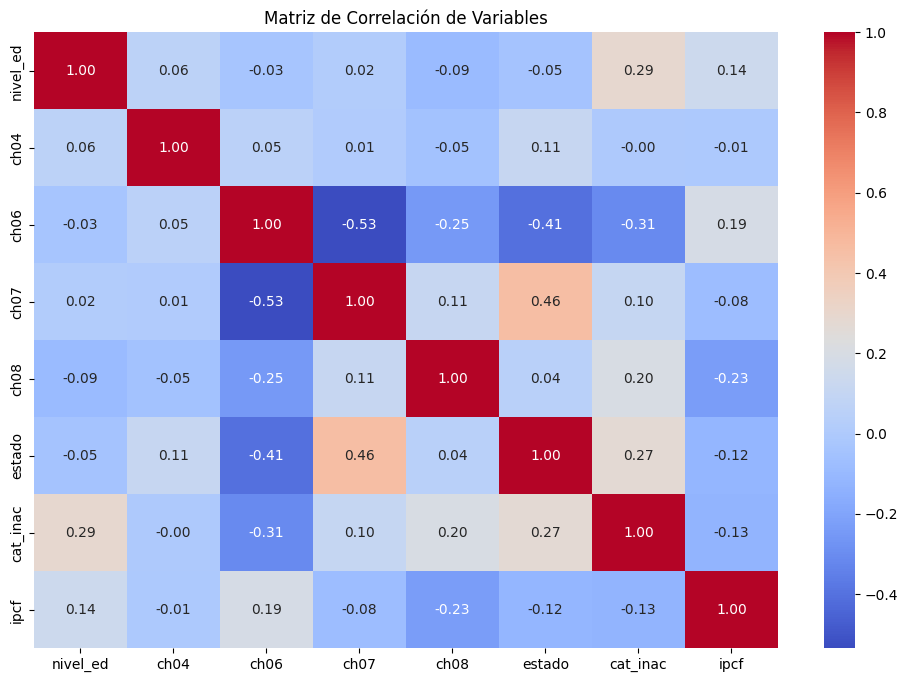

In [ ]:
# Matriz de correlación entre las variables
vars_corrmatrix = ['nivel_ed', 'ch04', 'ch06', 'ch07', 'ch08', 'estado', 'cat_inac', 'ipcf']

plt.figure(figsize=(12, 8))
corrmatrix = df_combined_tydy2[vars_corrmatrix].corr()
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.show()

Ejercicio 5

In [ ]:
def contador(df, columna, condicion, anos=None):
    """
    Cuenta la cantidad de veces que se cumpla la condición en una columna.

    Parámetros:
    - df (pd.DataFrame): El DataFrame que se analizará.
    - columna (str): El nombre de la columna donde se contarán las ocurrencias.
    - condición: La condición para el recuento en la columna especificada.
    - años (list): Una lista de años por los que se filtrarán los datos (opcional).

    Devuelve:
    - int: El recuento de veces que la condición aparece en la columna.
    """
    # Si se proporciona anos, filtrar por año
    if anos:
        df = df[df['ano4'].isin(anos)]

    return (df[columna] == condicion).sum()

# Contamos la cantidad de desocupados e inactivos en total:
print(f"Hay {contador(df_combined_tydy2, 'estado', 2)} desocupados")
print(f"Hay {contador(df_combined_tydy2, 'estado', 3)} inactivos")

# Creamos un diccionario que vaya de valores a definiciones
estado_dict = {
    0: "Entrevista individual no realizada (no respuesta al cuestionario)",
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 años"
}

def medias(df, columna_ref, columna_calc, condicion, anos=[2004, 2024]):
    """
    Calcula la media de una columna específica según una condición y uno o más años.

    Parámetros:
    - df (pd.DataFrame): El DataFrame que se analizará.
    - columna_ref (str): El nombre de la columna que se usará para filtrar la condición.
    - columna_calc (str): El nombre de la columna para la que se calculará la media.
    - condicion (n): La condición para filtrar los datos en columna_ref.
    - anos (list): Los años por los que se filtrará (el valor predeterminado es [2004, 2024]).

    Devuelve:
    - dict: Un diccionario con los valores medios de cada año y la media total.
    """
    # Diccionario para almacenar valores medios de cada año y la media total
    mean_values = {}

    # Calcular la media para cada año
    for ano in anos:
        df_filtered = df[(df[columna_ref] == condicion) & (df['ano4'] == ano)]
        mean_values[ano] = df_filtered[columna_calc].mean()

    # Calcular la media total (ignorando el filtro de año)
    df_filtered_total = df[df[columna_ref] == condicion]
    mean_values["Total"] = df_filtered_total[columna_calc].mean()

    return mean_values


# Creamos una lista para luego aplicar la función
# Lo hacemos con Ocupado, Desocupado e Inactivo
condiciones = [1, 2, 3]

for condicion in condiciones:
    # Obtener la frase correspondiente a la condición
    condition_phrase = estado_dict.get(condicion, f"Condicion {condicion}")

    # Obtener los valores medios para cada año (2004 y 2024) y la media total
    mean_by_year = medias(df_combined_tydy2, 'estado', 'ipcf', condicion)

    # Resultado de cada año y el total
    for ano, mean in mean_by_year.items():
        print(f"La media de ingreso per cápita familiar (IPCF) para la condición '{condition_phrase}' "
              f"{'en el año ' + str(ano) if ano != 'Total' else 'en total'} es {round(mean, 2)} pesos")


Hay 342 desocupados
Hay 4284 inactivos
La media de ingreso per cápita familiar (IPCF) para la condición 'Ocupado' en el año 2004 es 244.71 pesos
La media de ingreso per cápita familiar (IPCF) para la condición 'Ocupado' en el año 2024 es 144161.96 pesos
La media de ingreso per cápita familiar (IPCF) para la condición 'Ocupado' en total es 78144.54 pesos
La media de ingreso per cápita familiar (IPCF) para la condición 'Desocupado' en el año 2004 es 148.14 pesos
La media de ingreso per cápita familiar (IPCF) para la condición 'Desocupado' en el año 2024 es 85540.11 pesos
La media de ingreso per cápita familiar (IPCF) para la condición 'Desocupado' en total es 31858.02 pesos
La media de ingreso per cápita familiar (IPCF) para la condición 'Inactivo' en el año 2004 es 196.08 pesos
La media de ingreso per cápita familiar (IPCF) para la condición 'Inactivo' en el año 2024 es 119954.72 pesos
La media de ingreso per cápita familiar (IPCF) para la condición 'Inactivo' en total es 55574.67 pesos

Ejercicio 6

In [ ]:
# Contamos quienes no respondieron
print(f"Hay {contador(df_combined_tydy2, 'estado', 0)} personas que no respondieron su condición de actividad")
print(f"Hay {contador(df_combined_tydy2, 'ipcf', 0)} personas que no respondieron su ingreso per cápita familiar")

# Filtrar el DataFrame para las personas que respondieron (estado != 0)
respondieron = df_combined_tydy2[df_combined_tydy2['estado'] != 0]

# Filtramos para personas que no respondieron (estado == 0)
norespondieron = df_combined_tydy2[df_combined_tydy2['estado'] == 0]

# Guardamos cada dataframe como base de excel
respondieron.to_excel('respondieron.xlsx', index=False)
norespondieron.to_excel('norespondieron.xlsx', index=False)


Hay 6 personas que no respondieron su condición de actividad
Hay 983 personas que no respondieron su ingreso per cápita familiar


Ejercicio 7

   estado  PEA
0     3.0  0.0
1     3.0  0.0
2     1.0  1.0
3     1.0  1.0
4     3.0  0.0


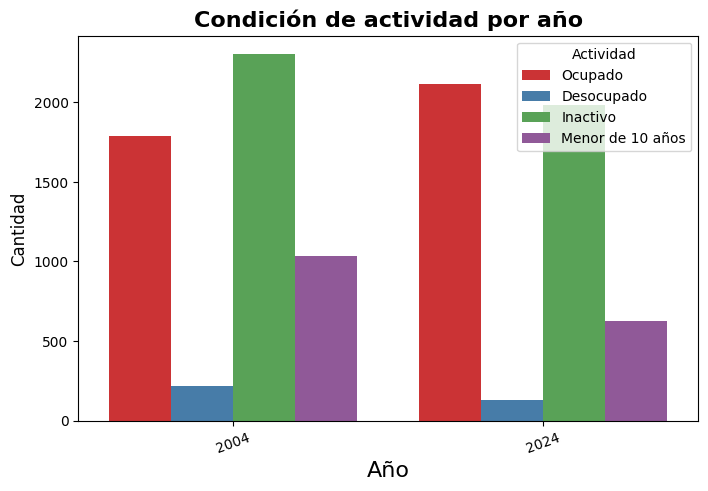

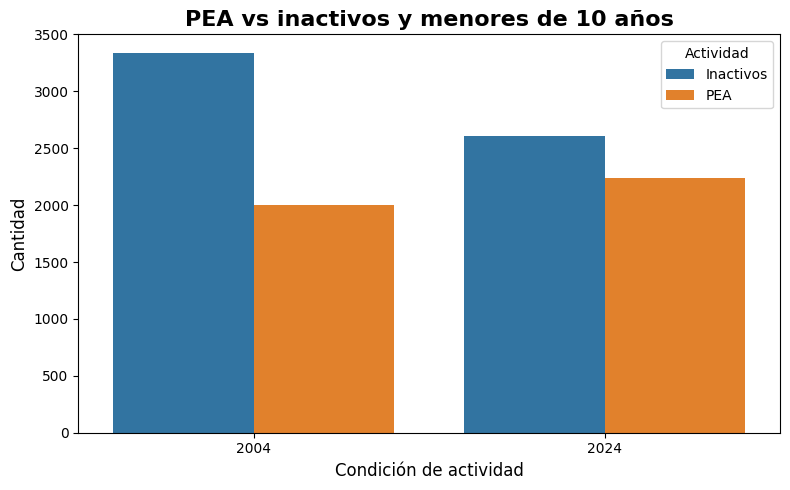

In [ ]:
# Iterar sobre la columna 'estado' y establecer la nueva columna 'PEA'
# Asignamos valor 1 si están ocupados o desocupados. 0 sino
respondieron.loc[(respondieron['estado'] == 1) | (respondieron['estado'] == 2), 'PEA'] = 1
respondieron.loc[respondieron['estado'].isin([3, 4]), 'PEA'] = 0

# Chequeamos el resultado
print(respondieron[['estado', 'PEA']].head())

# Diccionario que mapea el valor a la descripción
pea_dict = {
    1: "PEA",
    0: "Inactivos"
}

# Agrupamos por año y actividad
composition = respondieron.groupby(['ano4', 'estado']).size().reset_index(name='count')

composition['Actividad'] = composition['estado'].map(estado_dict)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=composition, x='ano4', y='count', hue='Actividad', palette='Set1')

# Customización
plt.title("Condición de actividad por año", fontsize=16, fontweight='bold')
plt.xlabel("Año", fontsize=16)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Actividad", loc="upper right")



# Plot 2: PEA == 1 vs PEA == 0

# Agrupamos por año y PEA
pea_composition = respondieron.groupby(['ano4','PEA']).size().reset_index(name='count')
pea_composition['Actividad'] = pea_composition['PEA'].map(pea_dict)

plt.figure(figsize=(8, 5))
sns.barplot(data=pea_composition, x='ano4', y='count', hue='Actividad', palette='tab10')

# Detalles estéticos para la comparación
plt.title("PEA vs inactivos y menores de 10 años", fontsize=16, fontweight='bold')
plt.xlabel("Condición de actividad", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(ticks=[0, 1])
plt.legend(title="Actividad", loc="upper right")

# Mostramos los plots
plt.tight_layout()
plt.show()

Ejercicio 8

In [ ]:
# Iteramos sobre la columna 'ch06' y establecemos la nueva columna 'PET'

# PET == 1 si respondieron aquellos menores de 65 años e iguales o mayores de 15. == 0 sino
respondieron.loc[(respondieron['ch06'] < 65) & (respondieron['ch06'] >= 15), 'PET'] = 1
respondieron.loc[(respondieron['ch06'] >= 65) & (respondieron['ch06'] < 15), 'PET'] = 0

# Chequear el resultado
print(respondieron[['ch06', 'PET']].sample(10))

pet_dict = {
    1: "PET",
    0: "Sin edad para trabajar"
}

# Plot: PET por año (ano4)
composition_pet = respondieron.groupby(['ano4', 'PET']).size().reset_index(name='count')

composition_pet['Actividad'] = composition_pet['PET'].map(pet_dict)

plt.figure(figsize=(8, 6))
sns.barplot(data=composition_pet, x='ano4', y='count', hue='Actividad', palette='Set2')

# Personalizacion del gráfico
plt.title("PET vs Sin edad para trabajar", fontsize=16, fontweight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.legend(title="PET", loc="upper right")
plt.xticks(ticks=[0, 1])

plt.tight_layout()
plt.show()

      ch06  PET
955   16.0  1.0
3361   NaN  NaN
9438  26.0  1.0
7845  60.0  1.0
4540  26.0  1.0
8222  55.0  1.0
2685  57.0  1.0
6522  37.0  1.0
2109   1.0  0.0
2312  29.0  1.0


Ejercicio 9

      estado  desocupado
6567     3.0         0.0
1505     1.0         0.0
9733     3.0         0.0
1914     1.0         0.0
6969     1.0         0.0
...      ...         ...
7140     4.0         0.0
3000     3.0         0.0
2855     4.0         0.0
438      3.0         0.0
5253     1.0         0.0

[100 rows x 2 columns]
La cantidad de personas desocupadas en el año 2004 fue 215
La cantidad de personas desocupadas en el año 2024 fue 127


<ipython-input-154-d166a7220119>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{float(y * 100)}' for y in ax.get_yticks()]) # Queremos ver porcentajes
<ipython-input-154-d166a7220119>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, rotation=0, ha='center', fontsize=10)


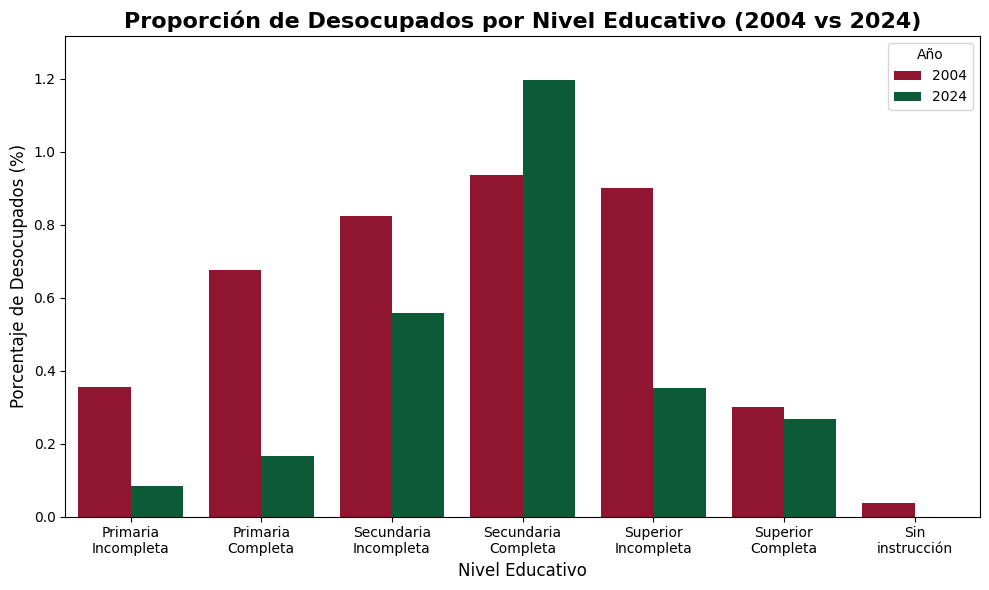

<ipython-input-154-d166a7220119>:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eje.set_yticklabels([f'{round(float(y * 100), 2)}' for y in eje.get_yticks()]) # Porcentajes con 2 decimales
<ipython-input-154-d166a7220119>:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eje.set_xticklabels([f'{x}' for x in edad_grupos_unicos])


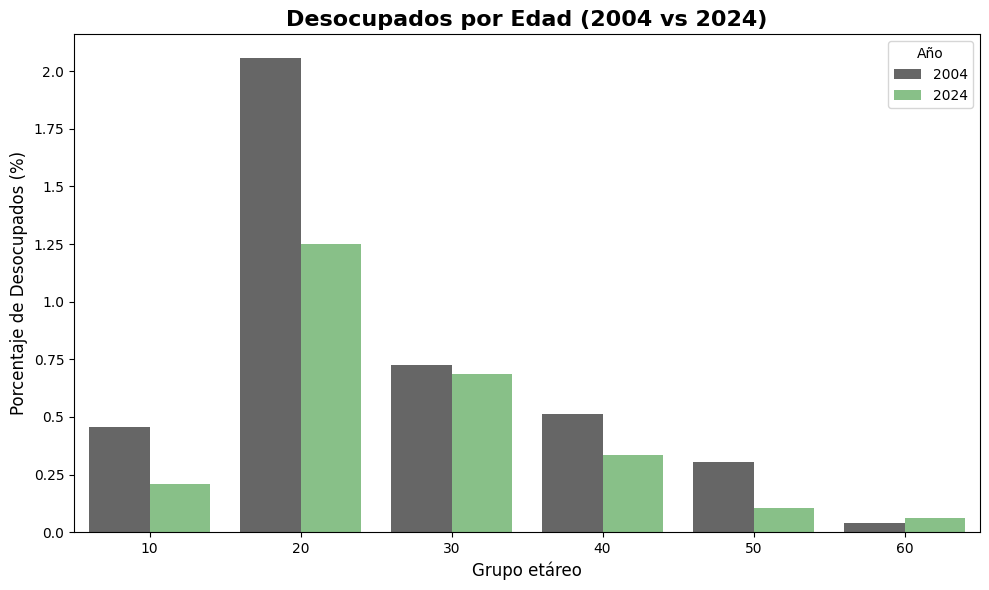

<ipython-input-154-d166a7220119>:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(round(y * 100))}' for y in ax.get_yticks()])
<ipython-input-154-d166a7220119>:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(round(y * 100))}' for y in ax.get_yticks()])


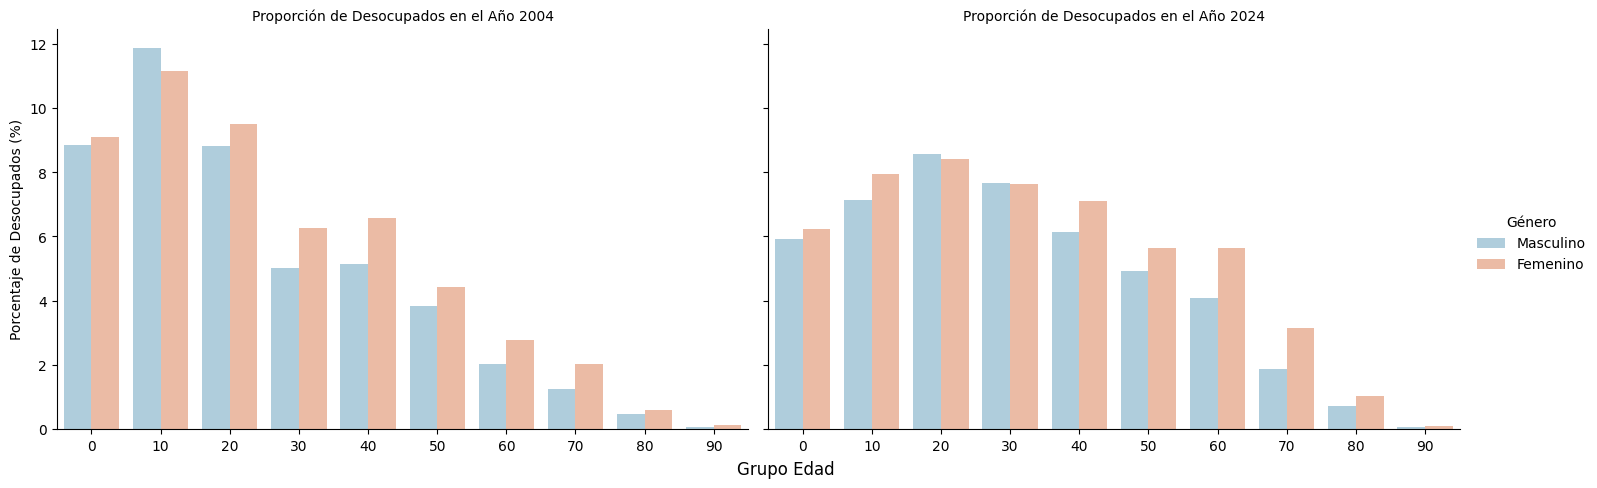

In [ ]:
# Iterar sobre la columna 'estado' y creamos una nueva columna 'desocupado'
# que vale 1 si lo son, 0 sino
respondieron.loc[(respondieron['estado'] == 2), 'desocupado'] = 1
respondieron.loc[respondieron['estado'].isin([1, 3, 4]), 'desocupado'] = 0

# chequeamos que se haya hecho bien
print(respondieron[['estado', 'desocupado']].sample(100))

anos = [2004, 2024]

# Recorremos cada año y contamos las ocurrencias de "desocupado"
for ano in anos:
    # Usamos la funcion de contador en 'desocupado' para el corriente año
    # Recordemos: funcion(dataframe, columna, condicion, año)
    count_desocupados = contador(respondieron, 'desocupado', 1, anos=[ano])
    print(f"La cantidad de personas desocupadas en el año {str(ano)} fue {count_desocupados}")

# Agrupamos por año, nivel educativo y si están desocupados
composicion_desocupados = respondieron.groupby(['ano4', 'nivel_ed', 'desocupado']).size().reset_index(name='count')

# Calcular la proporción de desocupados por nivel educativo y por año
composicion_desocupados['total_por_ano'] = composicion_desocupados.groupby('ano4')['count'].transform('sum')
composicion_desocupados['proporcion_desocupados'] = composicion_desocupados['count'] / composicion_desocupados['total_por_ano']

# Filtrar solo los desocupados (desocupado == 1)
composicion_desocupados = composicion_desocupados[composicion_desocupados['desocupado'] == 1]

# Mapeamos valores numericos de nivel_ed a su descripcion
nivel_ed_mapeo = {
    1: "Primaria Incompleta",
    2: "Primaria Completa",
    3: "Secundaria Incompleta",
    4: "Secundaria Completa",
    5: "Superior Incompleta",
    6: "Superior Completa",
    7: "Sin instrucción",
    9: "Ns./Nr."
}
composicion_desocupados['nivel_ed'] = composicion_desocupados['nivel_ed'].map(nivel_ed_mapeo)


#GRAFICO 1
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=composicion_desocupados, x='nivel_ed', y='proporcion_desocupados', hue='ano4', palette='RdYlGn')

ax.set_ylabel("Porcentaje de Desocupados (%)", fontsize=12)
ax.set_ylim(0, composicion_desocupados['proporcion_desocupados'].max() * 1.1) # Limites del eje x
ax.set_yticklabels([f'{float(y * 100)}' for y in ax.get_yticks()]) # Queremos ver porcentajes

# Ajustar las etiquetas del eje x para que se muestren en varios reglones
labels = ax.get_xticklabels()
new_labels = [label.get_text().replace(" ", "\n") for label in labels]
ax.set_xticklabels(new_labels, rotation=0, ha='center', fontsize=10)

# Personalizar el gráfico
plt.title("Proporción de Desocupados por Nivel Educativo (2004 vs 2024)", fontsize=16, fontweight='bold')
plt.xlabel("Nivel Educativo", fontsize=12)
plt.legend(title="Año", loc="upper right")
plt.tight_layout()
plt.show()


# Crear la nueva columna 'edad_grupo' agrupada de a 10 años
respondieron['edad_grupo'] = (respondieron['ch06'] // 10) * 10

# Agrupar por 'edad_grupo', 'desocupado' y 'ano4' para contar las cantidades
composicion_desocupados_edad = respondieron.groupby(['ano4', 'edad_grupo', 'desocupado']).size().reset_index(name='count')

# Calcular la proporción de desocupados por grupo de edad y por año
composicion_desocupados_edad['total_por_ano'] = composicion_desocupados_edad.groupby('ano4')['count'].transform('sum')
composicion_desocupados_edad['proporcion_desocupados'] = composicion_desocupados_edad['count'] / composicion_desocupados_edad['total_por_ano']

# Filtrar solo los desocupados (desocupado == 1)
composicion_desocupados_edad = composicion_desocupados_edad[composicion_desocupados_edad['desocupado'] == 1]

# GRAFICO 2
# Gráfico de barras de proporciones de desocupados por grupo de edad y año
plt.figure(figsize=(10, 6))
eje = sns.barplot(data=composicion_desocupados_edad, x='edad_grupo', y='proporcion_desocupados', hue='ano4', palette='Accent_r')
eje.set_ylabel("Porcentaje de Desocupados (%)", fontsize=12)
eje.set_yticklabels([f'{round(float(y * 100), 2)}' for y in eje.get_yticks()]) # Porcentajes con 2 decimales

# Filtrar valores únicos que no sean NaN en 'edad_grupo' y convertirlos a int para etiquetas del eje x
# Como arranca desde 0 pero no hay valores observaciones allí, lo ajustamos
edad_grupos_unicos = [int(x+10) for x in sorted(respondieron['edad_grupo'].dropna().unique())]
eje.set_xticklabels([f'{x}' for x in edad_grupos_unicos])

# Personalizar el gráfico
plt.title("Desocupados por Edad (2004 vs 2024)", fontsize=16, fontweight='bold')
plt.xlabel("Grupo etáreo", fontsize=12)
plt.legend(title="Año", loc="upper right")
plt.tight_layout()
plt.show()


# Agrupar por 'ano4', 'edad_grupo', 'ch04' (género) para contar las cantidades
composicion_genero_edad = respondieron.groupby(['ano4', 'edad_grupo', 'ch04']).size().reset_index(name='count')

# Calcular la proporción de desocupados por grupo de edad y por año
composicion_genero_edad['total_por_ano'] = composicion_genero_edad.groupby('ano4')['count'].transform('sum')
composicion_genero_edad['proporcion_genero'] = composicion_genero_edad['count'] / composicion_genero_edad['total_por_ano']

# Mapeo para los géneros
composicion_genero_edad['Genero'] = composicion_genero_edad['ch04'].map({1: 'Masculino', 2: 'Femenino'})

#GRAFICO 3

# Gráfico de barras facetadas por año
g = sns.FacetGrid(composicion_genero_edad, col="ano4", height=5, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x='edad_grupo', y='proporcion_genero', hue='Genero', palette='RdBu_r', dodge=True)
g.set_axis_labels("", "")
g.set_titles("Proporción de Desocupados en el Año {col_name}")
g.add_legend(title="Género")

# Ajuste del diseño final para eliminar ejes duplicados y centrar la etiqueta del eje x
for ax in g.axes.flat:
    ax.set_ylabel("Porcentaje de Desocupados (%)")

# Establecer las etiquetas en formato de porcentaje para todos los subplots
for ax in g.axes.flat:
    ax.set_yticklabels([f'{int(round(y * 100))}' for y in ax.get_yticks()])

for ax in g.axes.flat:
    # Establecer posiciones para que coincidan con el número de valores únicos de 'edad_grupo'
    edad_grupos_un = sorted(respondieron['edad_grupo'].dropna().unique())

    ax.set_xticks(range(len(edad_grupos_un)))
    ax.set_xticklabels([f'{int(x)}' for x in edad_grupos_un])

plt.subplots_adjust(top=0.9, bottom=0.1)
g.fig.text(0.5, 0.01, "Grupo Edad", ha="center", fontsize=12)
# Graficamos
plt.show()


In [ ]:
# Guardar los DataFrames filtrados en archivos de Excel
respondieron.to_excel('respondieron.xlsx', index=False)

Ejercicio 10

In [ ]:
# Procedemos con la formula de desocupacion oficial siendo : Tasa de desocupacion = (Desocupados/PEA)*100
# Y tasa de desocupacion alternativa = (Desocupados/ PET) * 100

def calcular_tasas(df):

    # Calculamos la tasa de desocupación según el INDEC
    tasa_des_indec = ((respondieron['desocupado']==1).sum() / (respondieron['PEA']).sum()) * 100

    # Calculamos la tasa de desocupación alternativa (desocupados sobre PET)
    tasa_des_alternativa = ((respondieron['desocupado']==1).sum() / (respondieron['PET']).sum()) * 100

    # Retornamos los resultados
    return {"Tasa de Desocupación INDEC": round(float(tasa_des_indec),2), "Tasa de Desocupación Alternativa": round(float(tasa_des_alternativa),2)}

# Llamamos a la función con el DataFrame `respondieron`
resultados = calcular_tasas(respondieron)
print(resultados)


{'Tasa de Desocupación INDEC': 8.06, 'Tasa de Desocupación Alternativa': 5.12}


Creación de dummies

In [ ]:
# Vamos a copiar el dataframe anterior para no perder la limpieza original
df_dummies = df_combined_tydy2.copy()

def create_dummies_with_nan(df, column, mapping_dict):
    """
    Crea columnas a partir de una variable categórica, conservando NaN en los datos originales
    y eliminando la columna original
    Cada categoría en mapping_dict creará una columna dummy independiente con 1, 0 y NaN.

    Parámetros:
    - df (pd.DataFrame): DataFrame que se modificará.
    - column (str): Columna a partir de la cual se crearán las dummies.
    - mapping_dict (dict): Asignación de categorías a sus valores numéricos o etiquetas.

    Devuelve:
    - pd.DataFrame: DataFrame con dummies añadidas y sin la variable categórica original.
    """
    for label, value in mapping_dict.items():
        df[label] = df[column].apply(lambda x: 1 if x == value else (0 if pd.notna(x) else np.nan))
    df.drop(column, axis=1, inplace=True)
    return df


# Aplicamos la función a las variables categóricas usando los diccionarios ya definidos
df_dummies = create_dummies_with_nan(df_dummies, 'ch04', ch04_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'ch07', ch07_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'ch08', ch08_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'nivel_ed', nivel_ed_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'estado', estado_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'cat_inac', cat_inac_mapping)

print(df_dummies.head())

     codusu  nro_hogar componente h15  ano4       trimestre region mas_500  \
0  125064          1.0        1.0  Sí  2004  1er. Trimestre    NEA       N   
1  125064          1.0        2.0  Sí  2004  1er. Trimestre    NEA       N   
2  125090          1.0        1.0  Sí  2004  1er. Trimestre    NEA       N   
3  125090          1.0        2.0  Sí  2004  1er. Trimestre    NEA       N   
4  125090          1.0        3.0  Sí  2004  1er. Trimestre    NEA       N   

  aglomerado  pondera  ... Desocupado  Inactivo Menor de 10 años  \
0    Posadas    137.0  ...        0.0       1.0              0.0   
1    Posadas    137.0  ...        0.0       1.0              0.0   
2    Posadas     99.0  ...        0.0       0.0              0.0   
3    Posadas     99.0  ...        0.0       0.0              0.0   
4    Posadas     99.0  ...        0.0       1.0              0.0   

  Jubilado/pensionado Rentista Estudiante Ama de casa Menor de 6 años  \
0                 1.0      0.0        0.0        